### Object-oriented perceptron API
En este codigo se crea una API para el perceptron basando en conceptos de OOP.

Se usara alguna notacion particular como ponerle un underscore '_' a atributos que no esten creados al momento de inicializar el objeto.


In [14]:
import numpy as np
import pandas as pd


In [33]:
class Perceptron:
    """
    Perceptron classifier

    Parametros
    -----------
    eta : float
        learning rate (betwween 0.0 and 1.0)
    n_iter : int
        Passer over the dataset.
    random_state : int
        Random number generator seed for random weight
        initalization
    
    Atributos
    -----------
    w_ : 1d-array
        Weights after fitting
    b_ : scalar
        Bias unit after fitting
    
    errors_ : list
        Numbers of missclasifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        Parametros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectores, where n_examples is the number of
            examples and n_features is the numbers of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self: object

        """
        
        rgen = np.random.RandomState(self.random_state) #Instancia de RandomState
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                               size=X.shape[1]) #Draw weights with a normal distribution with the size of the features
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0,1,0)
    

Ahora que implementamos este percetron, podemos inicializar el objeto para un dado ratio de aprendizaje $\eta$ y el numero de iteraciones _n_iter_.

Con el metodo *fit* inicializamos un parametro de bias $b$ y un vector de $\real^m$ dimensiones, donde $m$ es la dimension del dataset (features)

Con el _for_ loop iteramos sobre cada ejemplo in la data de entrenamieto y aplicamos la prediccion. Luego updateamos los parametros en base al error comedito en la prediccion.


*Nota*: el calcular el input utilizando la funcion *np.dot* es lo que se conoce como _vectorizacion_, en su forma mas basica la vectorizacion es el remplazo de calculos que podrian realizarse de manera tradicional utilizando un loop for por operaciones que actuen de manera simultanea en todos los alementos del array.

### Entranando el perceptron con el Iris dataset.
Vamos a testear el perceptron que construimos utilizando un dataset muy famoso, *Iris*. 

Para poder visualizar la region de decision el analisis estara limitado solamente a dos dimensiones y clasificaremos solamente dos timpos de flores. Si bien el perceptron es un *clasificador binario* el mismo puede extenderse a multi-clase usando la tecnica [one-versus-all (OvA)](https://en.wikipedia.org/wiki/Multiclass_classification).

Primero vamos a usar pandas para cargar el dataset directamente de from _UCI Machine Learning Repository_ en un DataFrame

In [34]:
import os
import pandas as pd

s =  'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s,
                header = None,
                encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Vamos a extraer los primeros 100 registros del dataset, ya que los primeros 50 corresponden a una Iris-Setosa y los otros 50 corresponden a Iris-versicolor. Para poder usar nuestro clasificador vamos a trasnformalo en un fector que va a tener dos posbiels valores, 1 (versicolor) y 0 (setosa).

Para las feature vamos a quedarnos con la primer (sepal lenght) y tercera columna (petal lenght).

Podemos visualizar todo esto utilizando matplotlib para entender la distribucion de nuestro dataset

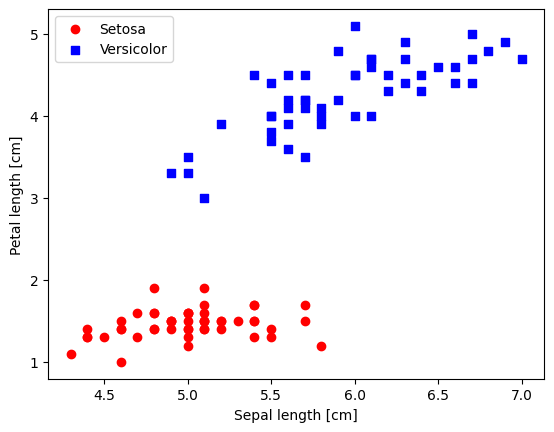

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',0,1)
# extract sepal lenght and petal lenght
X = df.iloc[0:100,[0,2]].values
# plot data
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker='o',label ='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],
            color = 'blue', marker='s',label ='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Ahora vamos a entrenar nuestro perceptron utiliznado estos datos y vamos a graficar como evoluciona el error con cada iteracion

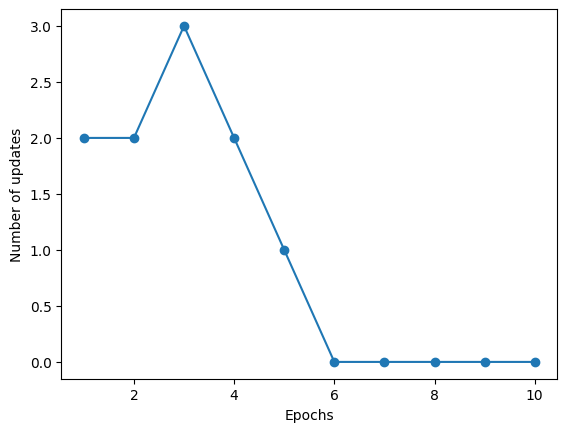

In [36]:
ppn = Perceptron(eta=0.1, n_iter= 10)
ppn.fit(X,y)

plt.plot(range(1,len(ppn.errors_)+1),
         ppn.errors_,marker= 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### Nota
Notar que luego de unas pocas iteraciones el error de clasificacion converge de manera perfecta. Esto no es la norma para el percetron, ya que la unica manera de que esto ocurra es que ambas clases esten separadas por un hyperplano lineal.

In [37]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    #setup marker generator and color map
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the desicion surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

     # plot class examples
    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label=f'Class {cl}',
                        edgecolor='black')

Primero definimos los colores y marcadores a utilizar, notar que esta funcion soporta mas de dos clases.

Luego determinamos el valor maximo y minimo de las features a utilizar para luego poder crear una grilla usando la funcion _meshgrid_. Como solamente estamos usando dos dimensiones, tenemos que aplanar la grilla y crear una matriz de 2x2.

Una vez hecho esto utilizar la funcion _countourf_ que mapea las regiones de decision.

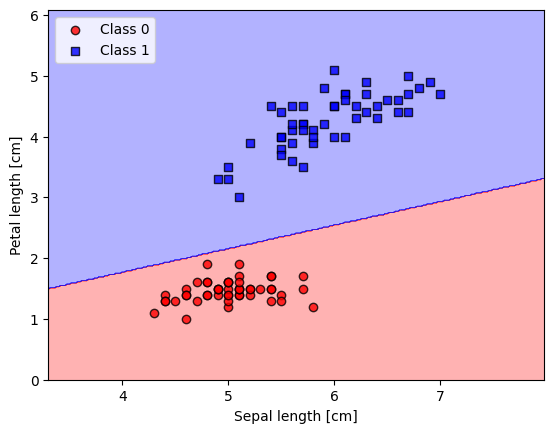

In [39]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Adaptative liner neurons and the convergence of learning
En este capitulo se revisa otro tipo de red neuronal de una sola capa: *ADAptative LIneal NEuron (Adaline)*

La diferencia entre este metodo y el anterior es que Adaline usa como funcion de activacion una **funcion lineal** en lugar de una **funcion escalon**

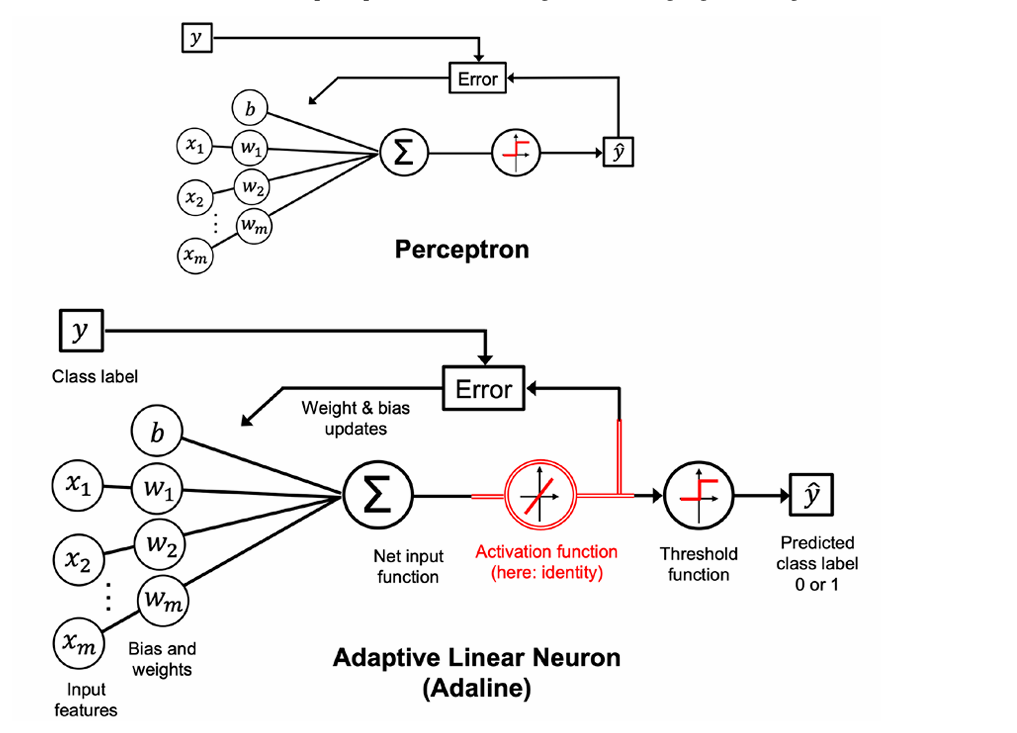

#### Minimizacion de la funcion de perdida con descenso de gradiente
Uno de los conceptos mas importantes en el aprendizaje supervisado es el concepto de **loss function**. Esto representa una funcion objetivo a minizar como parametro de un buen modelo, existen muchas funciones de perdida/costo dependiendo del problema.
En el caso de adaline la funcion de perdida esta basada en el **mean squared error (MSE)** que se calcula como 
$$
L(\vec{w},b) = \frac{1}{2n}\sum_{i=1}^{n} (y^{(i)}-\sigma(z^{(i)}))^{2}
$$

El termino $\frac{1}{2}$ esta por conveniencia para facilitar el resultado al derivar (lo cual es importante pues asi es como se minimiza una funcion)

Algo importante de utilizar funcion de activacion lineales es que son continuas (lo que permite derivarlas en cualquier punto) y convexas (esto significa que existe al menos un minimo y, por lo tanto, es posible minimizarlas)

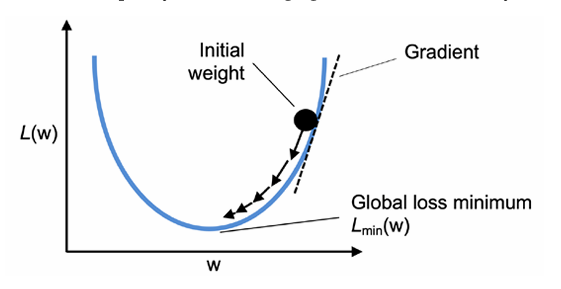


La idea detras del metodo es actualiar los valores de los parametros $\vec{w}$ y $b$ tomando un paso de valor contrario a la direccion del gradiente de la menra
$$\vec{w} =\vec{w}+\Delta \vec{w}, \space b=b+\Delta b $$
con 
$$
\Delta \vec{w} = -\eta \nabla_{w}L(w,b), \space  \Delta b = -\eta \nabla_{b}L(w,b)
$$
donde $\eta$ es el **learnin rate** del algoritmo